# Import Library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline
from sklearn import linear_model
import seaborn as sns
from scipy import stats

# Membaca Data

In [0]:
!wget download https://raw.githubusercontent.com/MochRizkyWijaya/Data-Analyst---Soal-Project-/master/mtcars_Data.csv

File 'mtcars_Data.csv' diimport secara manual ke google colabs

In [195]:
data = pd.read_csv('mtcars_Data.csv')
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Melihat Informasi Data

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Cars    32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Mengecek Data yang Kosong

In [197]:
check_data = data.isnull().sum()
check_data

# Tidak ada data yang kosong sehingga tidak perlu dilakukan perbersihan data

Cars    0
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

### Analisis Deskriptif

In [200]:
data.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000
mean,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125,20.090625
std,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152,6.026948
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000,10.400000
25%,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000,15.425000
50%,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000,19.200000
75%,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000,22.800000
max,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000,33.900000


## Menambahkan kolom baru mpg_level

In [201]:
# Memilih kolom yang diperlukan
data = data[['Cars','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'mpg']]

data['mpg_level'] = data['mpg']

# Membuat sebuah fungsi yang digunakan untuk menandai mpg_level
def get_mpg_level(mpg):
    if mpg < 20:
        return 'low'
    if mpg >= 20 and mpg <= 30:
        return 'medium'
    else:
        return 'hard'

# Menambahkan kolom mpg_level
data['mpg_level'] = data['mpg'].apply(get_mpg_level)

low = []
medium = []
hard = []

data.head(20)

,Cars,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg,mpg_level
0,Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0,medium
1,Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0,medium
2,Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1,22.8,medium
3,Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1,21.4,medium
4,Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.7,low
5,Valiant,6,225.0,105,2.76,3.460,20.22,1,0,3,1,18.1,low
6,Duster 360,8,360.0,245,3.21,3.570,15.84,0,0,3,4,14.3,low
7,Merc 240D,4,146.7,62,3.69,3.190,20.00,1,0,4,2,24.4,medium
8,Merc 230,4,140.8,95,3.92,3.150,22.90,1,0,4,2,22.8,medium
9,Merc 280,6,167.6,123,3.92,3.440,18.30,1,0,4,4,19.2,low


## Explorasi Data

## Barchart

In [0]:
data['mpg'] = data['mpg'].astype(int)

In [203]:
mpg_paling_banyak = data[['Cars', 'mpg']].sort_values(by='mpg', ascending=False).reset_index(drop=True)
mpg_paling_banyak.head(10)

,Cars,mpg
0,Toyota Corolla,33
1,Fiat 128,32
2,Lotus Europa,30
3,Honda Civic,30
4,Fiat X1-9,27
5,Porsche 914-2,26
6,Merc 240D,24
7,Datsun 710,22
8,Merc 230,22
9,Mazda RX4,21


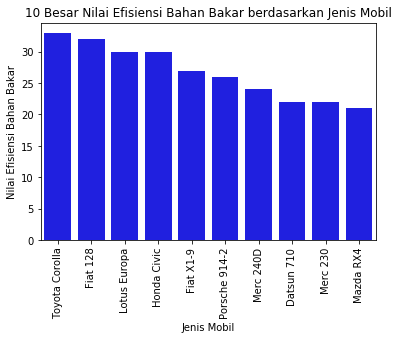

In [204]:
# MPG merupakan nilai efisisensi bahan bakar 

sns.barplot(x='Cars',y='mpg',data=mpg_paling_banyak[:10],color="blue")
plt.xlabel("Jenis Mobil")
plt.ylabel("Nilai Efisiensi Bahan Bakar")
plt.title("10 Besar Nilai Efisiensi Bahan Bakar berdasarkan Jenis Mobil")
plt.xticks(rotation='vertical')
plt.show()

Informasi nilai efisiensi bahan bakar berdasarkan mobil sangat penting untuk ditampilkan dalam penjualan mobil. Semakin tinggi nilai efisiensi bahan bakar maka akan semakin hemat biaya. Sehingga jenis mobil Toyota Corolla merupakan jenis mobil paling irit bahan bakar.

In [205]:
hp_paling_banyak = data[['Cars', 'hp']].sort_values(by='hp', ascending=False).reset_index(drop=True)
hp_paling_banyak.head(10)

,Cars,hp
0,Maserati Bora,335
1,Ford Pantera L,264
2,Duster 360,245
3,Camaro Z28,245
4,Chrysler Imperial,230
5,Lincoln Continental,215
6,Cadillac Fleetwood,205
7,Merc 450SLC,180
8,Merc 450SE,180
9,Merc 450SL,180


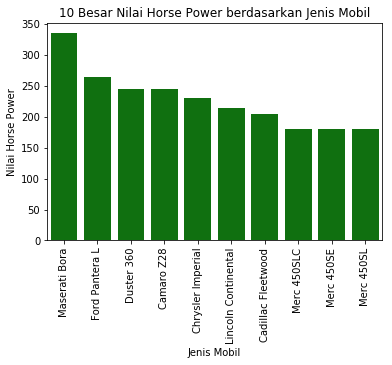

In [206]:
# HP merupakan Horse Power pada Mobil

sns.barplot(x='Cars',y='hp',data=hp_paling_banyak[:10],color="green")
plt.xlabel("Jenis Mobil")
plt.ylabel("Nilai Horse Power")
plt.title("10 Besar Nilai Horse Power berdasarkan Jenis Mobil")
plt.xticks(rotation='vertical')
plt.show()

**Horse Power** merupakan salah satu kriteria yang penting dalam membeli mobil. Horse Power erat kaitannya dengan Torsi. Torsi diartikan sebagai sejumlah usaha yang dilakukan untuk mencapai kecepatan dan waktu tertentu. Usaha itu sendirilah yang disebut horsepower. 

**Mobil yang memiliki spesifikasi Horse Power yang tinggi** mengindikasikan bahwa mobil tersebut cocok digunakan untuk di jalanan luar kota dan kecepatan yang tinggi. Sehingga, jenis mobil **Maserati Bora** paling cocok digunakan untuk bepergian ke luar kota. 

## Scatterplot

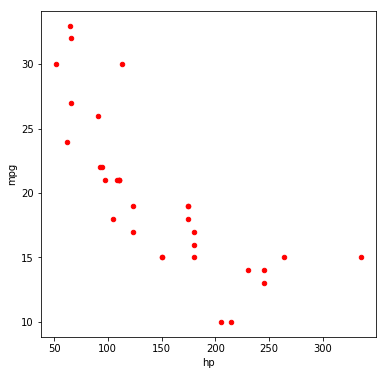

In [207]:
# Membandingkan mpg (efisiensi bahan bakar) dengan hp (House Power)
data.plot(kind="scatter", x="hp",y="mpg",figsize=(6,6), color="red");

Scatterplot menunjukkan bahwa hubungan linier antara hp dan mpg masih kasar dan masih susah diamati trendlinenya. Sehingga dapat dilakukan model regresi linier

In [208]:
# Model regresi linier
model_regresi = linear_model.LinearRegression()

# Model dilakukan pelatihan
model_regresi.fit(X = pd.DataFrame(data["hp"]), y = data["mpg"])

# Mengecek intercept sumbu y model pelatihan
print('Intercept :', model_regresi.intercept_)

# Mengecek koefisien sumbu y model pelatihan
print('Koefisien :', model_regresi.coef_)

Intercept : 29.652886178338758
Koefisien : [-0.06793616]


In [0]:
# Data Prediksi 
prediksi_data_pelatihan = model_regresi.predict(X = pd.DataFrame(data["hp"]))

# data sisa (residu) = data sesungguhnya (actual) - data prediksi (prediction)
data_sisa = data["mpg"] - prediksi_data_pelatihan

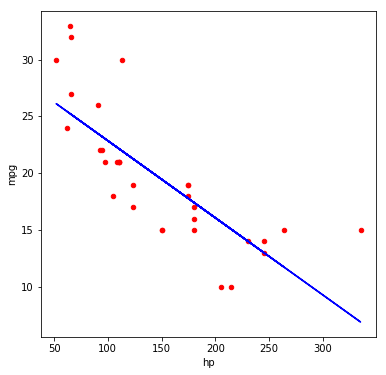

In [210]:
data.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(6,6),
           color="red")

# Plot garis regresi
plt.plot(data["hp"],      
         prediksi_data_pelatihan,  
         color="blue");

In [0]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [212]:
# Mencari error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['hp']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = model_regresi.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2.65
Residual sum of squares (MSE): 10.49
R2-score: 0.56


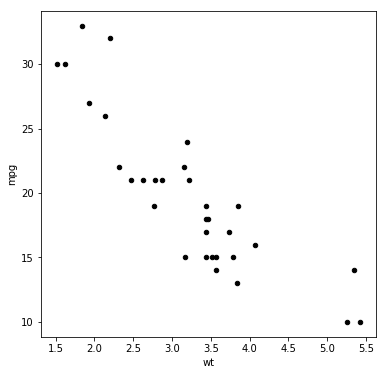

In [213]:
# Membandingkan mpg (efisiensi bahan bakar) dengan wt (berat keseluruhan kendaraan)
data.plot(kind="scatter", x="wt",y="mpg",figsize=(6,6), color="black");

In [214]:
# Model regresi linier
model_regresi = linear_model.LinearRegression()

# Model dilakukan pelatihan
model_regresi.fit(X = pd.DataFrame(data["wt"]), y = data["mpg"])

# Mengecek intercept sumbu y model pelatihan
print('Intercept :', model_regresi.intercept_)

# Mengecek koefisien sumbu y model pelatihan
print('Koefisien :', model_regresi.coef_)

Intercept : 36.85655639432634
Koefisien : [-5.33656271]


In [0]:
# Data Prediksi 
prediksi_data_pelatihan = model_regresi.predict(X = pd.DataFrame(data["wt"]))

# data sisa (residu) = data sesungguhnya (actual) - data prediksi (prediction)
data_sisa = data["mpg"] - prediksi_data_pelatihan

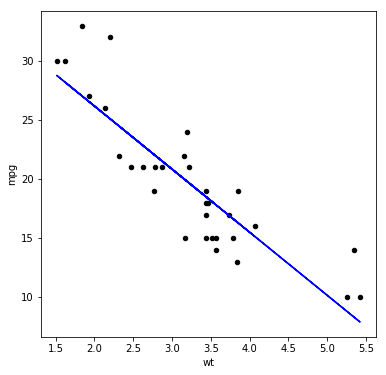

In [216]:
data.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(6,6),
           color="black")

# Plot garis regresi
plt.plot(data["wt"],      
         prediksi_data_pelatihan,  
         color="blue");

In [0]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [218]:
# Mencari error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['wt']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = model_regresi.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 6.08
Residual sum of squares (MSE): 58.59
R2-score: 0.82


### Pembahasan Scatterplot
Variabel mpg dengan wt memiliki nilai error(Mean absolute error, residual sum of squares, dan R2-score) yang lebih rendah daripada variabel mpg dengan hp.

**Nilai error yang semakin kecil** menunjukkan bahwa semakin bagus hubungan antara kedua variabel tersebut. 

**Secara visual** memang terlihat banyak data pencilan pada grafik mpg dengan hp jika dibandingkan grafik mpg dengan wt. Semakin banyak data pencilan maka akan semakin besar nilai errornya

## Cross Tab

In [219]:
pd.crosstab(data.Cars, data.hp, margins=True)

hp,52,62,65,66,91,93,95,97,105,109,110,113,123,150,175,180,205,215,230,245,264,335,All
Cars,,,,,,,,,,,,,,,,,,,,,,,
AMC Javelin,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
Cadillac Fleetwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Camaro Z28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
Chrysler Imperial,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
Datsun 710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Dodge Challenger,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
Duster 360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
Ferrari Dino,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
Fiat 128,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [220]:
pd.crosstab(data.Cars, data.mpg, margins=True)

mpg,10,13,14,15,16,17,18,19,21,22,24,26,27,30,32,33,All
Cars,,,,,,,,,,,,,,,,,
AMC Javelin,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Cadillac Fleetwood,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Camaro Z28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Chrysler Imperial,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Datsun 710,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Dodge Challenger,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Duster 360,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Ferrari Dino,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
Fiat 128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


**Cross Tab** digunakan untuk menampilkan tabulasi silang yang menunjukkan distribusi antar variabel. Cross tab dilakukan pada variabel 'Cars' dan 'mpg' serta variabel 'Cars' dan 'hp'. Setiap jenis mobil memiliki 1 jenis House Power (HP) dan 1 jenis mpg.  